In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [10]:
base_path = "results_"

In [11]:
datasets = ["AB", "Mushrooms"]

df = pd.DataFrame(columns = ["Algorithm","Dataset", "Time (s)", "Memory (bytes)", "Instances"])
for d in datasets:
    for file_name in os.listdir(base_path + d):
        if file_name.endswith(".txt"):
            file = open(base_path + d + "/" + file_name, "r")
            file_name = file_name.replace(".txt", "")
            file_params = file_name.split("_")
            algorithm = file_params[1]
            instances = int(file_params[2])
            line = file.readline()
            if not line.startswith("("):
                time, memory = eval(file.readline())
            else:
                time, memory = eval(line)
            df.loc[len(df)] = [algorithm, d, time, memory, instances]

In [12]:
label_order = ["IDSD", "QFinder", "SDMapStar", "BSD"]
palette = {
    "IDSD": "blue",
    "QFinder": "red",
    "SDMapStar": "green",
    "BSD": "orange"
}

In [17]:
## Save figures
base_path = ""
save_flag = True

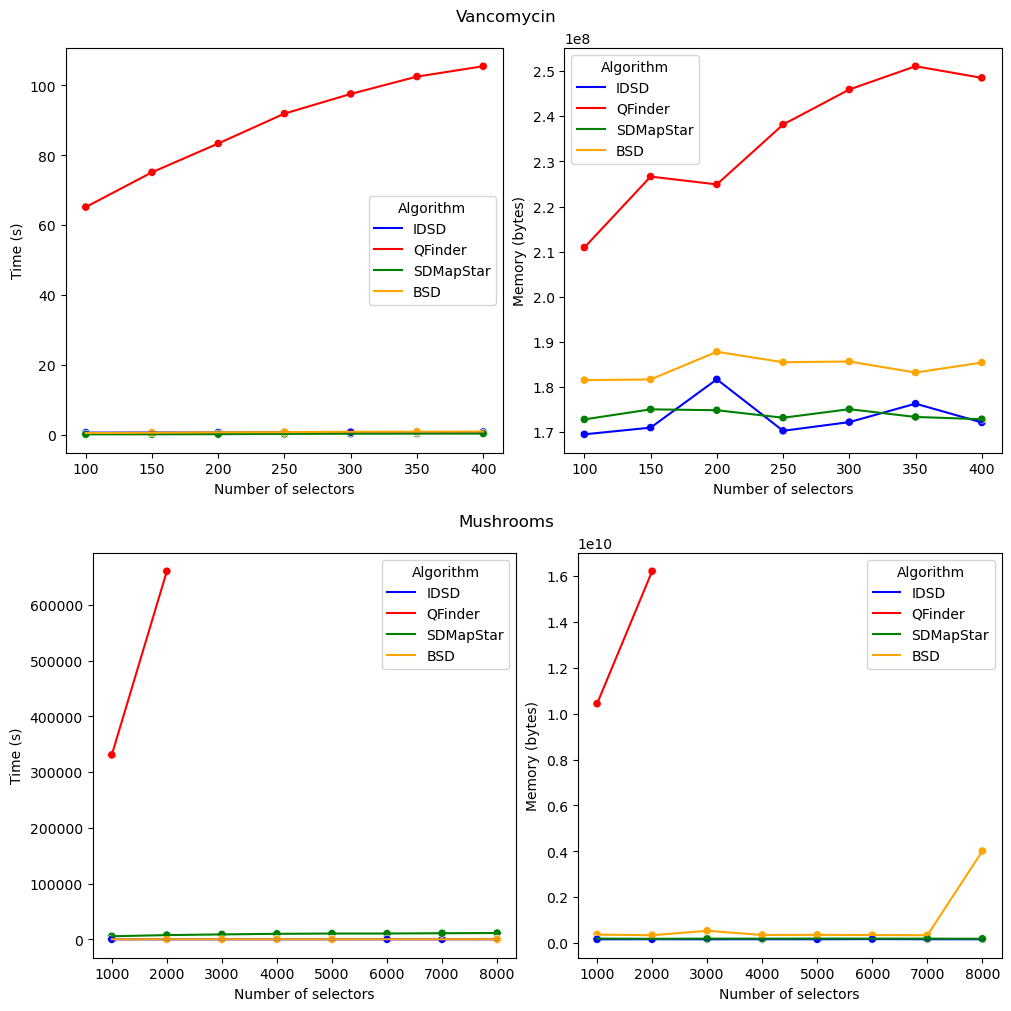

In [18]:
fig = plt.figure(constrained_layout=True, figsize=(10, 10))
subfigs = fig.subfigures(nrows=2, ncols=1)
for row, subfig in enumerate(subfigs):
    subfig.suptitle(datasets[row])
    if datasets[row] == "MIMIC":
        subfig.suptitle("Staph Aur Coag+")
    elif datasets[row] == "AB":
        subfig.suptitle("Vancomycin")
    d = datasets[row]
    axs = subfig.subplots(1, 2)
    filtered_df = df[df["Dataset"] == d]
    sns.lineplot(data = filtered_df, x = "Instances", y = "Time (s)", hue = "Algorithm", palette = palette, hue_order=label_order, ax=axs[0])
    sns.scatterplot(data = filtered_df, x = "Instances", y = "Time (s)", hue = "Algorithm", legend = False, palette = palette, ax=axs[0])
    # axs[0].set_yscale("log")
    axs[0].set_xlabel("Number of selectors")
    sns.lineplot(data = filtered_df, x = "Instances", y = "Memory (bytes)", hue = "Algorithm", palette = palette, hue_order=label_order, ax=axs[1])
    sns.scatterplot(data = filtered_df, x = "Instances", y = "Memory (bytes)", hue = "Algorithm", legend = False, palette = palette, ax=axs[1])
    # axs[1].set_yscale("log")
    axs[1].set_xlabel("Number of selectors")
    # plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

if save_flag:
    fig.savefig(base_path + "/e2.png", dpi=300)
